In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.read_csv(
    'data/release_dates.csv',
    parse_dates=['date'],
    infer_datetime_format=True,
)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [7]:
release_dates['month'] = release_dates['date'].dt.month

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

<AxesSubplot:xlabel='month'>

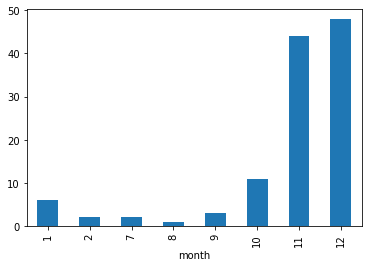

In [16]:
release_dates[(release_dates['country'] == 'USA') & (release_dates['title'].str.contains('Christmas'))].groupby('month').size().plot(kind = 'bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [18]:
r = release_dates[(release_dates['title'].str.startswith("The Hobbit")) & (release_dates['country'] == 'USA')]

<AxesSubplot:>

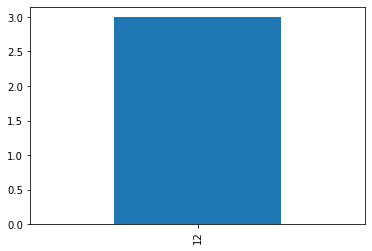

In [21]:
r['month'].value_counts().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [23]:
r = release_dates[(release_dates['title'].str.contains('Romance')) & (release_dates['country'] == 'USA')]

<AxesSubplot:>

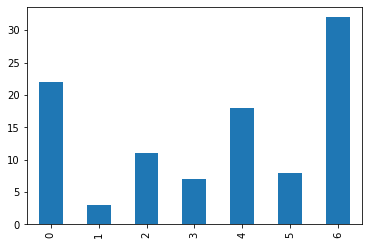

In [30]:
r['day_of_week'].value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [32]:
action = release_dates[(release_dates['title'].str.contains('Action')) & (release_dates['country'] == 'USA')]

In [34]:
action['day_of_week'] = action['date'].dt.dayofweek

C:\Users\Suraj\AppData\Local\Temp\ipykernel_8916\1741418573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action['day_of_week'] = action['date'].dt.dayofweek


<AxesSubplot:xlabel='day_of_week'>

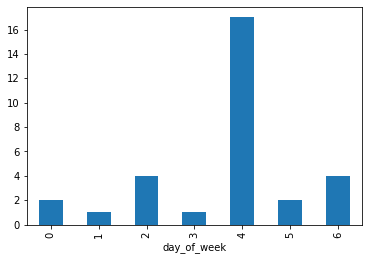

In [37]:
action.groupby('day_of_week').size().plot(kind= 'bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [38]:
release_dates.head()

,title,year,country,date,month
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,6
1,#BKKY,2016,Cambodia,2017-10-12,10
2,#Beings,2015,Romania,2015-01-29,1
3,#Captured,2017,USA,2017-09-05,9
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21,1


In [39]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [45]:
c = pd.merge(release_dates, cast, left_on = 'title', right_on = 'title', how = 'inner').drop('year_y',axis=1)

In [47]:
c[(c['name'] == 'Judi Dench') & (c['country'] == 'USA') & ((c['year_x']//10 *10) == 1990)]

,title,year_x,country,date,month,name,type,character,n
414522,A Midsummer Night's Dream,1999,USA,1999-05-14,5,Judi Dench,actress,Titania,16.0
6469733,GoldenEye,1995,USA,1995-11-17,11,Judi Dench,actress,M,6.0
6788993,Hamlet,1990,USA,1991-01-18,1,Judi Dench,actress,Hecuba,12.0
6794807,Hamlet,1996,USA,1996-12-25,12,Judi Dench,actress,Hecuba,12.0
8181183,Jack & Sarah,1995,USA,1996-03-22,3,Judi Dench,actress,Margaret,3.0
8265778,Jane Eyre,1996,USA,1996-04-12,4,Judi Dench,actress,Mrs. Fairfax,18.0
11137773,Mrs Brown,1997,USA,1997-10-03,10,Judi Dench,actress,Queen Victoria,1.0
14301318,Shakespeare in Love,1998,USA,1999-01-08,1,Judi Dench,actress,Queen Elizabeth,12.0
15824268,Tea with Mussolini,1999,USA,1999-05-14,5,Judi Dench,actress,Arabella,2.0
19798171,The World Is Not Enough,1999,USA,1999-11-19,11,Judi Dench,actress,M,6.0


### In which months do films with Judi Dench tend to be released in the USA?

<AxesSubplot:xlabel='month'>

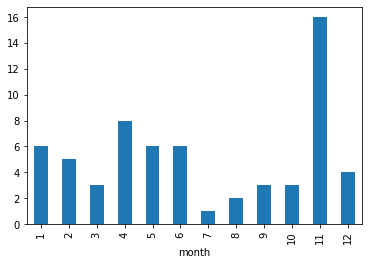

In [51]:
c[(c['name'] == 'Judi Dench') & (c['country'] == 'USA')].groupby('month').size().plot(kind = 'bar')

### In which months do films with Tom Cruise tend to be released in the USA?

<AxesSubplot:xlabel='month'>

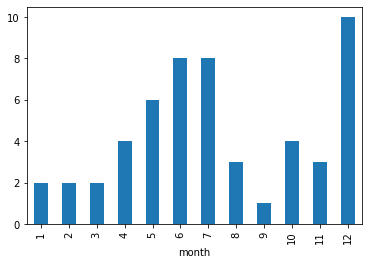

In [52]:
c[(c['name'] == 'Tom Cruise') & (c['country'] == 'USA')].groupby('month').size().plot(kind = 'bar')